In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

ptdf = pd.read_csv("data/pit_stops.csv")
lpdf = pd.read_csv("data/lap_times.csv")

ptdf.rename(columns = {'lap':'pit_lap', 'time':'pit_time', 'milliseconds':'pit_ms'}, inplace = True)
df = pd.merge(ptdf, lpdf, on = 'driverId', how = 'inner')
df.drop('raceId_y', axis = 1, inplace = True)
df.head()

,raceId_x,driverId,stop,pit_lap,pit_time,duration,pit_ms,lap,position,time,milliseconds
0,841,153,1,1,17:05:23,26.898,26898,1,21,2:13.879,133879
1,841,153,1,1,17:05:23,26.898,26898,2,21,1:40.659,100659
2,841,153,1,1,17:05:23,26.898,26898,3,21,1:33.293,93293
3,841,153,1,1,17:05:23,26.898,26898,4,21,1:33.144,93144
4,841,153,1,1,17:05:23,26.898,26898,5,21,1:33.320,93320


We want to see if there is a correlation with pit stop times and lap times. I believe that we can truly see how important pit times are to winning lap times. In order to analyze a correlation, it would be best to merge the times together.We know that generations of racers and progression of technology can shorten both times, and this should still be present in our analysis.

Because of the massive size of the database, we need to get a random sample in order to get a proper graph. We also need to normalize the data in order to accurately present the data. This is because each circuit has varying lap and pit times due to the many different types of courses. From the circuit's length, corners, to DRS zones of each course, we would need a way to effectively show how the two times would correlate.

Text(0, 0.5, 'Lap times')

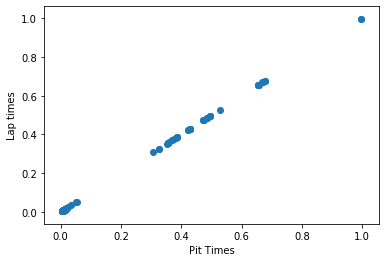

In [3]:
df_norm_pt = df['pit_ms']/df['pit_ms'].abs().max()
df_norm_lp = df['milliseconds']/df['milliseconds'].abs().max()
plt.scatter(df_norm_pt.sample(1500, random_state = 1), df_norm_pt.sample(1500, random_state = 1))
plt.xlabel('Pit Times')
plt.ylabel('Lap times')

From the normalized graph, we can see that there is a positive linear relationship between pit times and lap times. This is also from the random samples that we generated from the dataframe. Now this is just a visual representation of a small group of races and drivers.

Now lets take a deeper dive into the correlations. We have made variables for the normalized times and will use that for our correlation testing.

In [20]:
df_norm_times = pd.merge(df_norm_pt, df_norm_lp, right_index=True, left_index=True)
df_norm_times.sample().corr()

,pit_ms,milliseconds
pit_ms,1.000000,-0.005835
milliseconds,-0.005835,1.000000


From this, we can that there actually isn't a correlation between the two variables. To see this more, let's use the original, un-normalized variables from the same random sample. 

Text(0, 0.5, 'Lap times')

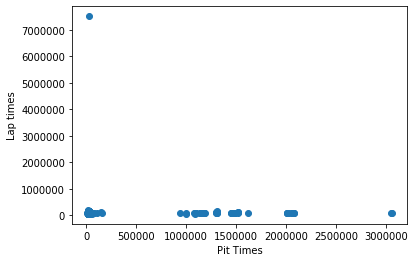

In [22]:
plt.scatter(df['pit_ms'].sample(1500, random_state = 1), df['milliseconds'].sample(1500, random_state = 1))
plt.xlabel('Pit Times')
plt.ylabel('Lap times')

We can see that there is now no correlation between lap and pit times. Normalizing the data did not properly assess the two variables in finding a correlation. But using the corr function and using the base data, we can properly see that there is no correlation between teams and drivers pit times to lap times.

# Sources

1. https://www.geeksforgeeks.org/normalize-a-column-in-pandas/

2. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

3. https://sparkbyexamples.com/pandas/pandas-combine-two-series-into-dataframe/#:~:text=Combine%20Two%20Series%20Using%20pandas.&text=merge()%20can%20be%20used,True%2C%20left_index%3DTrue)%20.